## GROUP 3 - PROJECT 2 - Occupancy Detection

**Author:** Mahesh

**PROJECT DESCRIPTION**

The Occupancy Detection was chosen for this project as it is an ideal candidate for classification tools like Linear Regression and Decision tree. The data set is an experimental data which describes binary classification (room classification) from Temperature, Humidity, Light and CO2. Ground-truth occupancy was obtained from time stamped pictures that were taken every minute. The project would be about measuring the performance of each classification tool, and compare the tools with respect to the data set for accuracy.


- **Data set used:** Occupancy Detection Data set 
- **No. of Attributes:** 7 No. of Instances: 20560 
- **Classification tools to be used:** Linear Regression, Decision Tree and SVM

Dataset repository: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#

**Attribute Analysis**


In [1]:
import pandas as pa
#import pandas.tools.plotting
from pandas.plotting import scatter_matrix

import itertools
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib import style
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

%matplotlib inline

def read_data(file_path):
    data = pa.io.parsers.read_csv(file_path,header = 0)
    return data

def conver_data(file):
    data=file
    data["date"] = pa.to_datetime(data["date"])
    data["year"] = data["date"].dt.year
    data["month"] = data["date"].dt.month
    data["day"] = data["date"].dt.day
    data["hour"] = data["date"].dt.hour
    data["minute"] = data["date"].dt.minute
    data["second"] = data["date"].dt.second
    data['weekday'] = data[['date']].apply(lambda x: dt.datetime.strftime(x['date'], '%A'), axis=1)
    return data

def concat_data(d1,d2):
    data = pa.concat([d1,d2])
    return data

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #print('Confusion matrix')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

h = .02  # step size in the mesh

#Original datasets
occ_train1 = read_data('datatraining.txt')
occ_train2 = read_data('datatest.txt')
occ_test = read_data('datatest2.txt')

#Merging all the data files to make a larger training set
occ_uncon=concat_data(occ_train1,occ_train2)
occ_uncon=concat_data(occ_uncon,occ_test)
#convert date timestamp to Month, weekdays, days, months, hours
occ_ttrain=conver_data(occ_uncon)

#sns.pairplot(occ_ttrain, x_vars=['Temperature','Humidity','Light','CO2','HumidityRatio'], y_vars=['Occupancy'], size=7, aspect=0.7, kind='reg')

occ_ttrain = occ_ttrain[['Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']]

datasets = occ_ttrain
classifiers = [SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5)]
names = ["RBF SVM","Decision Tree", "Random Forest"]

X = occ_ttrain[['Temperature','Humidity','Light','CO2','HumidityRatio']]
y = occ_ttrain[['Occupancy']]

#occ_uncon.head()
occ_ttrain.head()
#Date column was removed as the data is too sparse for any deductions

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,23.18,27.2720,426.0,721.25,0.004793,1
2,23.15,27.2675,429.5,714.00,0.004783,1
3,23.15,27.2450,426.0,713.50,0.004779,1
4,23.15,27.2000,426.0,708.25,0.004772,1
5,23.10,27.2000,426.0,704.50,0.004757,1


C:\Users\computer_wala\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\computer_wala\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


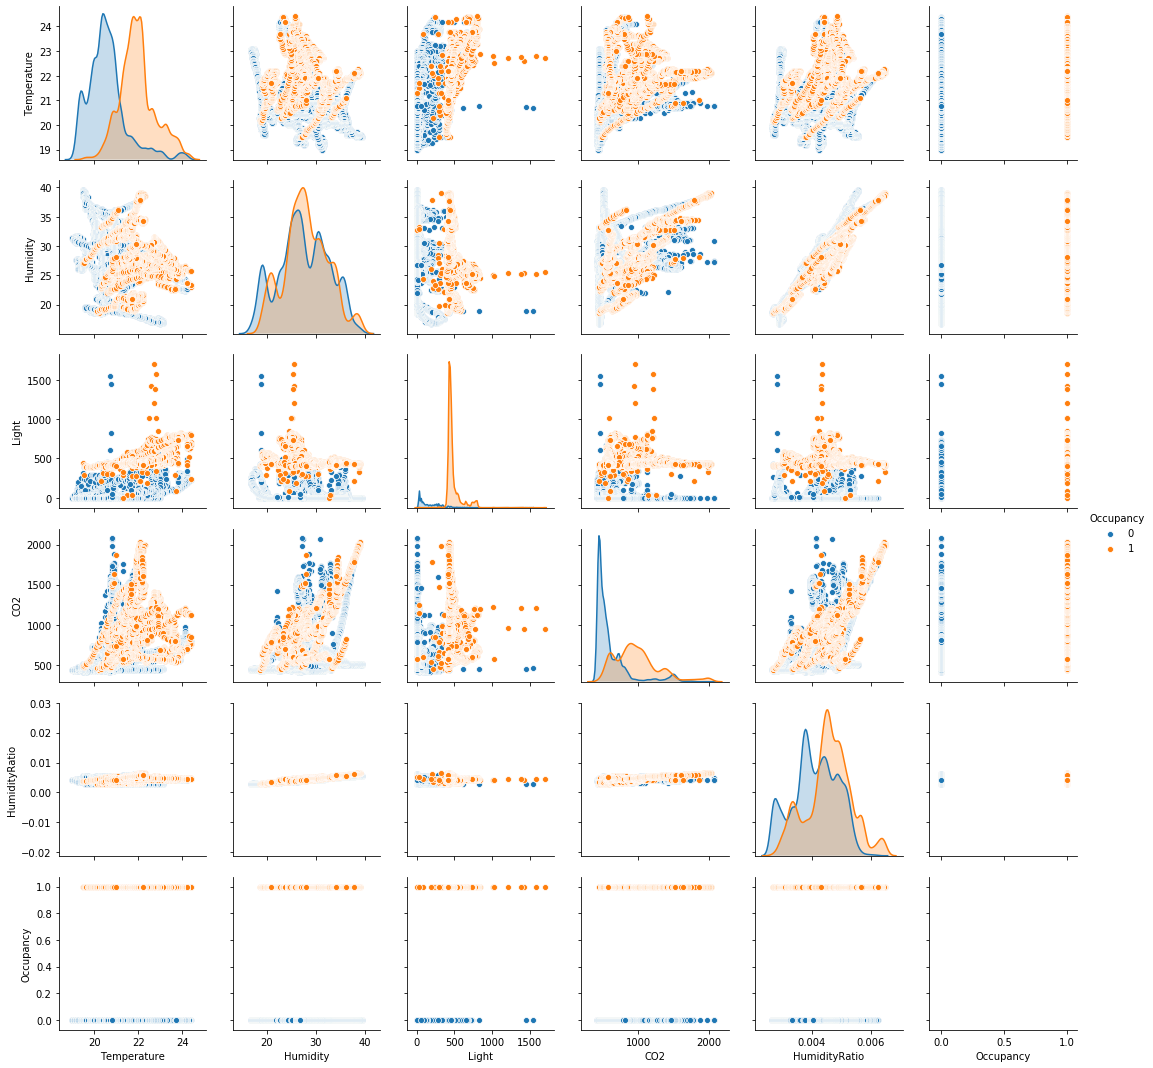

In [2]:
sns.pairplot(occ_ttrain, hue='Occupancy')

In [3]:
#sns.pairplot(occ_ttrain, hue='Temperature', palette='Set2')


### Using Decision Tree

The combined data

In [4]:
#Decision Tree

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,random_state=42)

decisionTree = DecisionTreeClassifier(max_depth=3)
decisionTree.fit(X_train, y_train)

predictions=decisionTree.predict(X_test)
print ("Accuracy of Decision Tree",accuracy_score(y_test,predictions))

Accuracy of Decision Tree 0.9888132295719845


In [5]:
print (decisionTree.feature_importances_)
print (X.columns)

[3.20583246e-04 1.37952961e-03 9.94600074e-01 2.72897360e-03
 9.70839542e-04]
Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], dtype='object')


In [6]:
with open("tree.dot", "w") as output_file:
    export_graphviz(decisionTree, feature_names=X.columns, out_file=output_file)

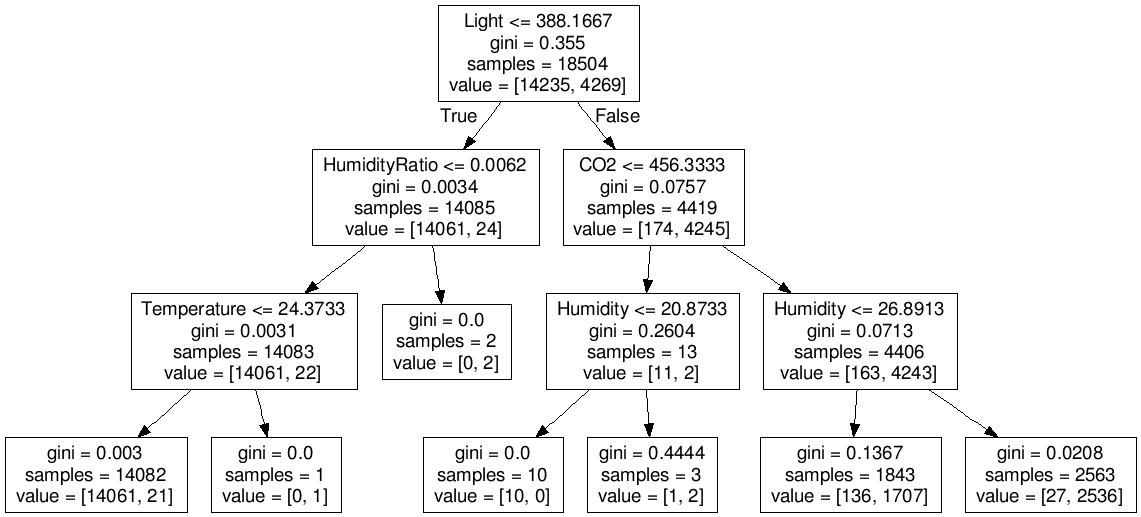

In [7]:
## execute dot to convert .dot file to .png on the command line
# OR copy contents of .dot file into either of the below links
# http://sandbox.kidstrythisathome.com/erdos/
# http://www.webgraphviz.com/

#(graph,) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('tree.png')

from IPython.core.display import Image 
Image(filename='tree.png')

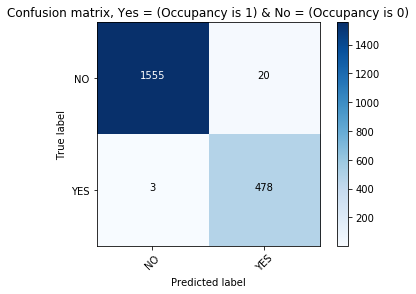

In [8]:
cnf_matrix =confusion_matrix(y_test,predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NO','YES'], title='Confusion matrix, Yes = (Occupancy is 1) & No = (Occupancy is 0)')
plt.show()



### Neural Network using MLP classifier of Scikit Learn

In [9]:
# Neural Network - MLP classifier
X=np.array(X)
y=np.array(y)
y=y.ravel()

X=X.tolist()
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(6,6,6))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

cnf_matrix =confusion_matrix(y_test,predictions)
print ("Accuracy of MLP Neural network",accuracy_score(y_test,predictions))
print ("")
print(classification_report(y_test,predictions))

Accuracy of MLP Neural network 0.9888132295719845

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1575
           1       0.96      1.00      0.98       481

    accuracy                           0.99      2056
   macro avg       0.98      0.99      0.98      2056
weighted avg       0.99      0.99      0.99      2056



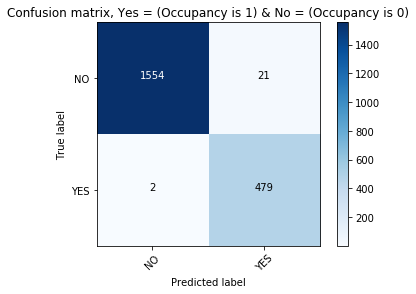

In [10]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NO','YES'], title='Confusion matrix, Yes = (Occupancy is 1) & No = (Occupancy is 0)')
plt.show()

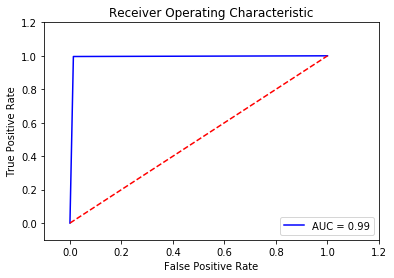

In [11]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM

In [12]:
#SVM

X = occ_ttrain[['CO2','HumidityRatio']]

X=np.array(X)
X=X.tolist()
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1,random_state=42)

clfs=SVC(kernel='rbf',gamma=2, C=1)
clfs.fit(X_train, y_train)

y_pred=clfs.predict(X_test)
zxc=accuracy_score(y_test,y_pred)
print('Accuracy of SVM Classifier', zxc)

Accuracy of SVM Classifier 0.9095330739299611


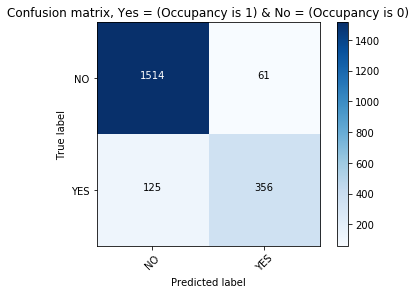

In [13]:
cnf_matrix =confusion_matrix(y_test,y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['NO','YES'], title='Confusion matrix, Yes = (Occupancy is 1) & No = (Occupancy is 0)')
plt.show()

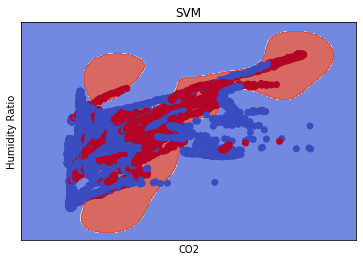

In [14]:
# create a mesh to plot in
X.shape[1]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = clfs.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('CO2')
plt.ylabel('Humidity Ratio')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM')

plt.show()

In [15]:
X.shape[1]

2

In [16]:
#occ_ttrain.groupby('Occupancy').size()
#occ_ttrain.corr(method='pearson')
#occ_ttrain.skew()
